In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sn
import pandas as pd
%matplotlib inline

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


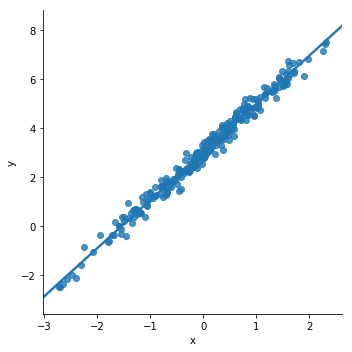

In [2]:
m=2
c=3
x=np.random.randn(256) # Creates an array ith 256 entries in it

noise = np.random.randn(256)/4

y = m*x+c+noise #computes the LR fn

df = pd.DataFrame()

df['x'] = x
df['y'] = y

sn.lmplot(x ='x', y ='y', data = df)
#sn.regplot(x ='x', y ='y', data = df)

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [4]:
# Cross Validation
# Here data is split into test and training sets

x_train = x.reshape(-1,1).astype('float32') # Here -1 means everything else will be added to that axis in this case since size odf x is 256 so 256*1 so inplace of -1 256 will be replaced implicitly
y_train = y.reshape(-1,1).astype('float32')

In [5]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.Linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.Linear(x)
        return out
        

In [6]:
input_dim = x_train.shape[1] # Here input_dim is given the value corresponding to no. of classes or features or Linear constructor takes in two arguments which are no. of features for both input and output (in the same order as mentioned here)
output_dim = y_train.shape[1]

In [7]:
input_dim, output_dim # both contain a single feature

(1, 1)

In [8]:
model = LinearRegression(input_dim,output_dim) # Here the Linear Regression Function is assignedto our model

In [9]:
criterion = nn.MSELoss()

In [11]:
[w,b] = model.parameters()

In [15]:
w,b
model

LinearRegression(
  (Linear): Linear(in_features=1, out_features=1, bias=True)
)

In [68]:
def plott(title = ""):
    plt.figure(figsize = (12,4))
    plt.title(title)
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0].numpy()
    b1 = b.data[0].numpy()
    x1 = (np.array([0., 1.]))
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
    

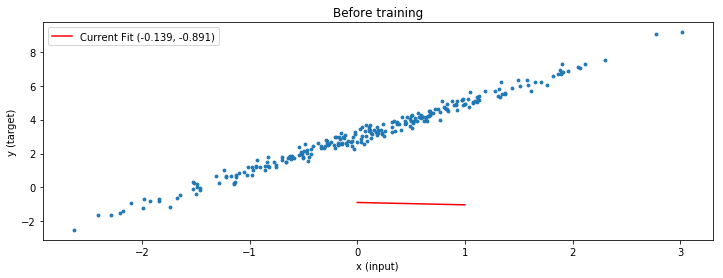

In [69]:
plott('Before training')

In [16]:
loss = criterion(model(x),y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'